# Compare Mediations

- Those that lead to peace agreements and those that don't


In [1]:
__author__      = 'Roy Gardner'

%run ./mediation_functions.py


## Load the mediation-actor data

- Load data into a biadjacency matrix with mediations in rows and actors in columns
- Matrix values are zero except where a relation between a mediation and an actor exists where the value is an non-zero integer that codes the mediation-actor edge properties.
- Apart from the matrix other data are extracted or computed.
- All data are stored in data_dict




In [2]:

data_path = './data/'
mediation_file = 'mediation.csv'
actors_file = 'actors.csv'

data_dict = load_mediation_data(mediation_file,actors_file,data_path)

print(data_dict['header'])


['year', 'mediation ID', 'negotiation ID', 'conflict locale', 'conflict sub-locale', 'locale Gleditsch ID', 'third-party', 'third-party Gleditsch ID', 'location of neogitations', 'negotiation location Gleditsch ID', 'negotiation type', 'leading actor', 'leading actor 2', 'leading actor 3', 'good offices', 'mediation', 'hosting talks', 'negotiating and drafting', 'manipulating', 'humanitarian', 'witness/party to agreement', 'other', 'agreement', 'peace agreement', 'ceasfire agreement', 'agreement name', 'notes_1', 'source_1', 'note_2', 'source_2', 'note_3', 'source_3', 'note_4', 'source_4', 'note_5', 'source_5', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', '']


## Extract sub-matrices

In [3]:
peace_mediation_ids = [k for k,v in data_dict['vertices_dict'].items() if v['type'] == 'MED' and\
                  v['data']['peace_agreement'] == 1]

non_peace_mediation_ids = [k for k,v in data_dict['vertices_dict'].items() if v['type'] == 'MED' and\
                  v['data']['peace_agreement'] != 1]

print(len(peace_mediation_ids))
print(len(non_peace_mediation_ids))

peace_mediation_indices = [data_dict['mediation_vertices'].index(v) for v in peace_mediation_ids]
peace_matrix = data_dict['matrix'][np.ix_(peace_mediation_indices,range(0,len(data_dict['actor_vertices'])))]

# Get columns containing non-zero value
indices = np.where(peace_matrix > 0)
peace_actor_indices = list(set(indices[1]))
peace_actor_ids = [data_dict['actor_vertices'][index] for index in peace_actor_indices]

peace_matrix = peace_matrix[np.ix_(range(0,peace_matrix.shape[0]),peace_actor_indices)]
print(peace_matrix.shape)

non_peace_mediation_indices = [data_dict['mediation_vertices'].index(v) for v in non_peace_mediation_ids]
non_peace_matrix = data_dict['matrix'][np.ix_(non_peace_mediation_indices,\
                                              range(0,len(data_dict['actor_vertices'])))]

non_indices = np.where(non_peace_matrix > 0)
non_peace_actor_indices = list(set(non_indices[1]))
non_peace_actor_ids = [data_dict['actor_vertices'][index] for index in non_peace_actor_indices]

non_peace_matrix = non_peace_matrix[np.ix_(range(0,non_peace_matrix.shape[0]),non_peace_actor_indices)]
print(non_peace_matrix.shape)


57
303
(57, 46)
(303, 101)


## Aggregated actors

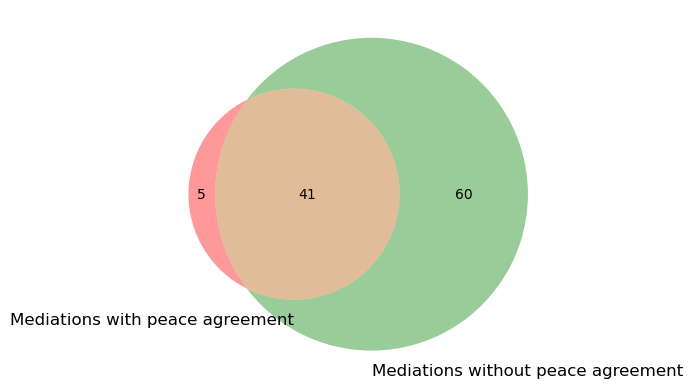


{'Philippines', 'Pakistan', 'Benin', 'Brazil', 'Tanzania'}


In [4]:
venn2([set(peace_actor_ids),set(non_peace_actor_ids)],\
      ['Mediations with peace agreement','Mediations without peace agreement'])
plt.show()
print()

left_partition = set(peace_actor_ids).difference(set(non_peace_actor_ids))
print(left_partition)


## Lead actors

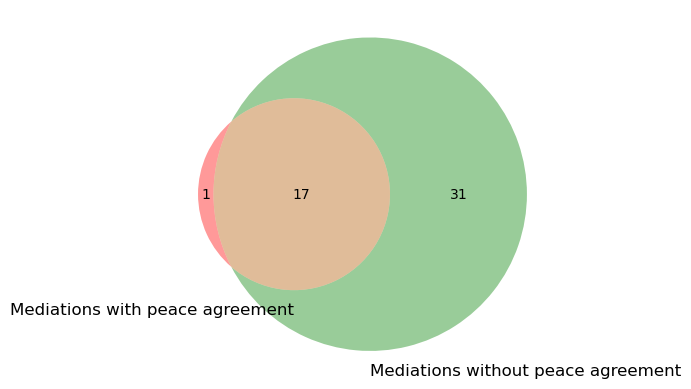


Tanzania


In [38]:
# Collect lead actors from both matrices
props_length = len(get_empty_edge_dict())

peace_indices = []
for row in peace_matrix:
    p = [int(recover_edge_dict(v,props_length)['is_lead']) for v in row]
    peace_indices.extend([i for i,v in enumerate(p) if v==1])
    
non_peace_indices = []
for row in non_peace_matrix:
    p = [int(recover_edge_dict(v,props_length)['is_lead']) for v in row]
    non_peace_indices.extend([i for i,v in enumerate(p) if v==1])

venn2([set(peace_indices),set(non_peace_indices)],\
      ['Mediations with peace agreement','Mediations without peace agreement'])
plt.show()
print()

left_partition = set(peace_indices).difference(set(non_peace_indices))
print(data_dict['actor_vertices'][list(left_partition)[0]])
  

## Co-occurrence

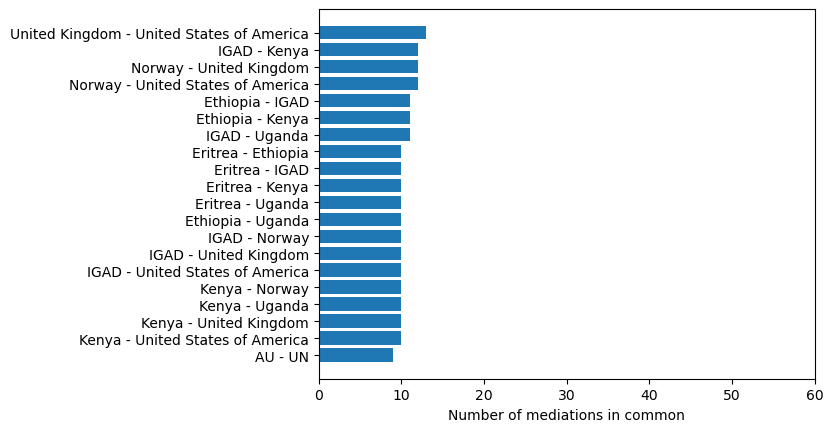

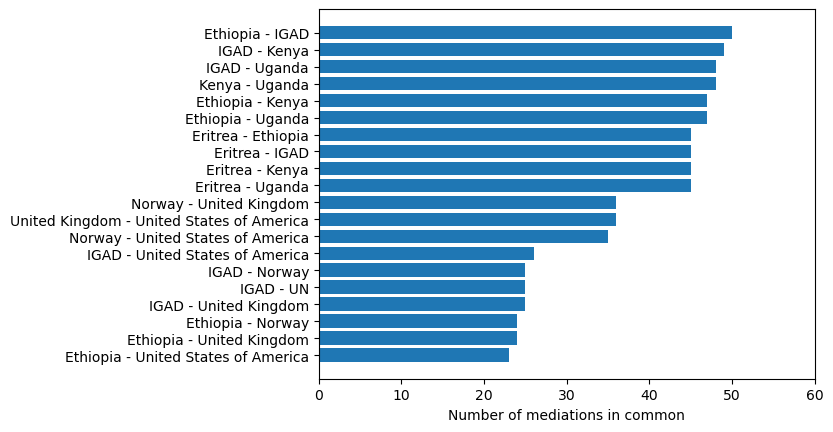

In [5]:
# Get the co-occurrence matrix
peace_co_matrices = get_cooccurrence_matrices(peace_matrix)
non_peace_co_matrices = get_cooccurrence_matrices(non_peace_matrix)

peace_actor_upper = np.triu(peace_co_matrices[0],k=1)
non_peace_actor_upper = np.triu(non_peace_co_matrices[0],k=1)

rc = np.nonzero(peace_actor_upper) # Row and column indices of non-zero pairs
z = list(zip(list(rc[0]),list(rc[1])))
scores = [(peace_actor_ids[t[0]],peace_actor_ids[t[1]],peace_actor_upper[t[0]][t[1]]) for t in z]
scores = sorted(scores,key=lambda t:t[2],reverse=True)
#print(scores)
print()

n = 20

plt.barh(range(0,n),[t[2] for t in scores[0:n]])
plt.yticks(range(0,n),[t[0] + ' - ' + t[1] for t in scores[0:n]])
plt.xticks(range(0,70,10))
plt.xlabel('Number of mediations in common')
plt.gca().invert_yaxis()
plt.show()

rc = np.nonzero(non_peace_actor_upper) # Row and column indices of non-zero pairs
z = list(zip(list(rc[0]),list(rc[1])))
scores = [(non_peace_actor_ids[t[0]],non_peace_actor_ids[t[1]],non_peace_actor_upper[t[0]][t[1]]) for t in z]
scores = sorted(scores,key=lambda t:t[2],reverse=True)

plt.barh(range(0,n),[t[2] for t in scores[0:n]])
plt.yticks(range(0,n),[t[0] + ' - ' + t[1] for t in scores[0:n]])
plt.xticks(range(0,70,10))
plt.xlabel('Number of mediations in common')
plt.gca().invert_yaxis()
plt.show()


## Diagonals

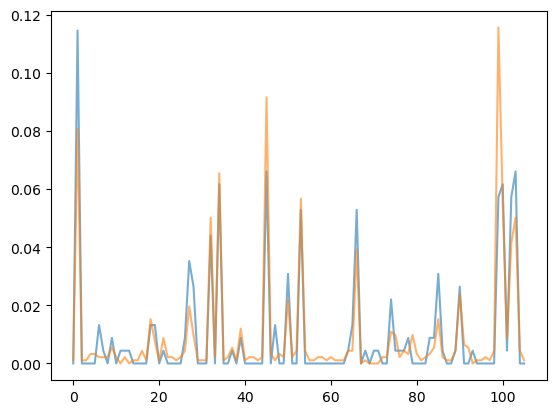

PearsonRResult(statistic=0.9009741980646956, pvalue=1.6687861392668955e-39)


In [12]:
peace_mediation_ids = [k for k,v in data_dict['vertices_dict'].items() if v['type'] == 'MED' and\
                  v['data']['peace_agreement'] == 1]

non_peace_mediation_ids = [k for k,v in data_dict['vertices_dict'].items() if v['type'] == 'MED' and\
                  v['data']['peace_agreement'] != 1]

peace_mediation_indices = [data_dict['mediation_vertices'].index(v) for v in peace_mediation_ids]
peace_matrix = data_dict['matrix'][np.ix_(peace_mediation_indices,range(0,len(data_dict['actor_vertices'])))]


non_peace_mediation_indices = [data_dict['mediation_vertices'].index(v) for v in non_peace_mediation_ids]
non_peace_matrix = data_dict['matrix'][np.ix_(non_peace_mediation_indices,\
                                              range(0,len(data_dict['actor_vertices'])))]


peace_co_matrices = get_cooccurrence_matrices(peace_matrix)
non_peace_co_matrices = get_cooccurrence_matrices(non_peace_matrix)

peace_diag = np.diag(peace_co_matrices[0])
tot = sum(peace_diag)
peace_diag = [v/tot for v in peace_diag]

non_peace_diag = np.diag(non_peace_co_matrices[0])
tot = sum(non_peace_diag)
non_peace_diag = [v/tot for v in non_peace_diag]

x = range(0,len(peace_diag))
plt.plot(x,peace_diag,alpha=0.6)
plt.plot(x,non_peace_diag,alpha=0.6)
plt.show()

print(stats.pearsonr(peace_diag,non_peace_diag))


In [13]:
from scipy.signal import find_peaks

print('Peace')
p = find_peaks(peace_diag,height=0.06)
z = list(zip(list(p[0]),list(p[1]['peak_heights'])))
z = sorted(z,key=lambda t:t[1],reverse=True)
for t in z:
    print('\t',data_dict['actor_vertices'][t[0]])
print()

print('Non-peace')
p = find_peaks(non_peace_diag,height=0.04)
z = list(zip(list(p[0]),list(p[1]['peak_heights'])))
z = sorted(z,key=lambda t:t[1],reverse=True)
for t in z:
    print('\t',data_dict['actor_vertices'][t[0]])
print()


Peace
	 AU
	 IGAD
	 United States of America
	 Ethiopia
	 Uganda

Non-peace
	 UN
	 IGAD
	 AU
	 Ethiopia
	 Kenya
	 Eritrea
	 United States of America



## Classifier

### Aggregate mediation roles

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train,peace_test = train_test_split([row for row in peace_matrix],test_size=10)

X = []
y = []
for row in train:
    X.append(row)
    y.append(1)

train,non_peace_test = train_test_split([row for row in non_peace_matrix],test_size=10)

for row in train:
    X.append(row)
    y.append(0)

print(len(X),len(y))    
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

import warnings
warnings.filterwarnings('ignore')

print(knn.predict(peace_test))
print()
          
print(knn.predict(non_peace_test))


340 340
[1 0 1 1 0 0 0 0 1 1]

[0 0 1 0 0 0 0 0 1 0]


### Lead actor only

In [45]:
# Collect lead actors from both matrices
props_length = len(get_empty_edge_dict())

peace_rows = []
for row in peace_matrix:
    peace_rows.append([int(recover_edge_dict(v,props_length)['is_lead']) for v in row])
    
train,peace_test = train_test_split(peace_rows,test_size=10)

X = []
y = []
for row in train:
    X.append(row)
    y.append(1)

non_peace_rows = []
for row in non_peace_matrix:
    non_peace_rows.append([int(recover_edge_dict(v,props_length)['is_lead']) for v in row])

train,non_peace_test = train_test_split(non_peace_rows,test_size=10)

for row in train:
    X.append(row)
    y.append(0)

print(len(X),len(y))    
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

import warnings
warnings.filterwarnings('ignore')

print(knn.predict(peace_test))
print()
          
print(knn.predict(non_peace_test))


340 340
[0 1 0 0 0 1 1 0 1 1]

[1 1 1 1 1 1 1 1 1 0]


In [36]:
peace_indices = []
for row in peace_test:
    peace_indices.extend([i for i,v in enumerate(row) if v==1])   
print(list(set(peace_indices)))

non_peace_indices = []
for row in non_peace_test:
    non_peace_indices.extend([i for i,v in enumerate(row) if v==1])  
print(list(set(non_peace_indices)))


[1, 74, 45, 85]
[1, 99, 100, 103, 77, 45, 88, 59]
